<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/title.png' width=500/></center>

# 4.데이터프레임 집계

- 상세 데이터가 아닌 집계된 데이터에 대한 분석을 자주 요구하니 익숙해져야 할 내용입니다.
- sum(), mean(), max(), min(), count() 메서드를 사용해 지정한 열 또는 열들을 기준으로 집계합니다.
- 평균을 구하는 메서드가 avg()가 아닌 mean() 임을 주의하기 바랍니다.

In [1]:
# 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pd.__version__

'1.3.4'

In [119]:
# 데이터 읽어오기
path = 'https://raw.githubusercontent.com/Jangrae/csv/master/tips.csv'
tip = pd.read_csv(path)

# 확인
tip.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


- 우선 집계에 대하여 다음과 같이 정리해 볼 수 있습니다.

<img src='https://raw.githubusercontent.com/jangrae/img/master/groupby.png' width=500 align="left"/>

- **연속값**, **범주값**이라는 용어에 익숙해 지길 바랍니다.
- 대부분은 범주값을 기준으로 연속값의 합, 평균 등을 집계합니다.
- 가끔은 범주값의 개수나 최빈값을 집계하기도 합니다.
- 집계 결과에 대한 시각화를 통해 더 나은 통찰력을 얻게 합니다.

## 4.1.합 구하기

### 4.1.1.열 하나 집계

- 우선 특정 열의 값 합은 다음과 같이 구할 수 있습니다.

In [7]:
tip['total_bill']

0      16.99
1      10.34
2      21.01
3      23.68
4      24.59
       ...  
239    29.03
240    27.18
241    22.67
242    17.82
243    18.78
Name: total_bill, Length: 244, dtype: float64

In [9]:
# total_bill 합계
# tip['total_bill'].sum(axis=0)
tip['total_bill'].sum()

4827.77

In [11]:
# total_bill, tip 각각의 합계
tip[['total_bill','tip']].sum()

total_bill    4827.77
tip            731.58
dtype: float64

**1) 집계하기**

- 만일 day 별로 합을 구하고자 한다면 다음과 같이 합니다.
- 아래 결과 값 네 개를 더하면 전체 합이 됩니다.
- **as_index=True**를 설정(기본값)하면 집계 기준이 되는 열이 인덱스 열이 됩니다.
- 집계 결과가 tip 열만 가지니 시리즈가 됩니다.

In [23]:
# day별 tip 합계 --> 시리즈
tip.groupby(by='day', as_index=True)[['tip']].sum() # day를 인덱스로해라

,tip
day,
Fri,51.96
Sat,260.40
Sun,247.39
Thur,171.83


In [22]:
tip.groupby(by='day', as_index=False)['tip'].sum()

,day,tip
0,Fri,51.96
1,Sat,260.40
2,Sun,247.39
3,Thur,171.83


In [21]:
tip.groupby(by='day', as_index=False)[['tip','total_bill']].sum()

,day,tip,total_bill
0,Fri,51.96,325.88
1,Sat,260.40,1778.40
2,Sun,247.39,1627.16
3,Thur,171.83,1096.33


- **[['tip']].sum()** 과 같이 하면 열이 여럿이라는 의미여서 결과가 **데이터프레임**이 됩니다.

In [26]:
# day별 tip 합계 --> 데이터프레임
tip.groupby(by='day', as_index=True)[['tip']].sum()

,tip
day,
Fri,51.96
Sat,260.40
Sun,247.39
Thur,171.83


- **as_index=False**를 설정하면 행 번호를 기반으로 한 정수 값이 인덱스로 설정됩니다.

In [30]:
# day별 tip 합계 --> 데이터프레임
tip.groupby(by='day', as_index=False)['tip'].sum()

,day,tip
0,Fri,51.96
1,Sat,260.40
2,Sun,247.39
3,Thur,171.83


**2) 데이터프레임으로 선언**

- 집계 결과를 새로운 데이터프레임으로 선언하여 사용하는 경우가 많습니다.
- 집계된 결과를 반복해서 사용하거나, 분석 대상이 되는 경우 데이터프레임으로 선언함이 유익합니다.

In [53]:
# day별 tip 합계 조회
tip_sum = tip.groupby(by='day', as_index=False)[['tip','total_bill']].sum()

# 확인
tip_sum

,day,tip,total_bill
0,Fri,51.96,325.88
1,Sat,260.40,1778.40
2,Sun,247.39,1627.16
3,Thur,171.83,1096.33


**3) 집계 결과 시각화**

- 위 과정으로 집계한 결과를 막대그래프로 간단히 시각화 해봅니다.
- matplotlib 패키지의 pyplot을 plt 별칭을 주어 불러와 시각화에 사용합니다.

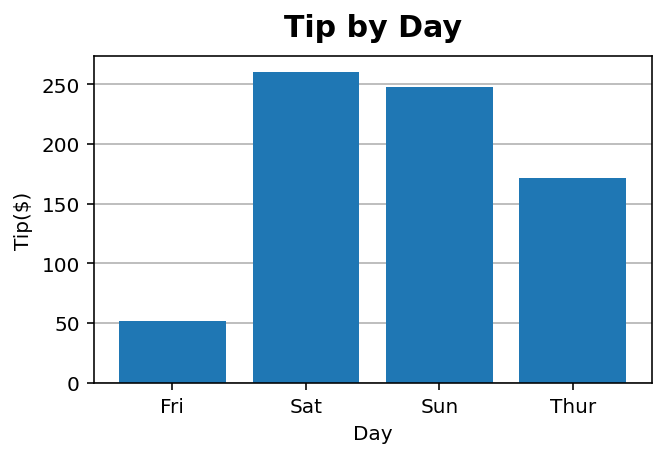

In [72]:
# 라이브러리 불러오기
import matplotlib.pyplot as plt
%config InlineBackend.figure_format='retina'

# day 별 tip 비교 시각화
# tip.groupby(by='day',as_index=False)['tip'].sum().plot()

plt.rc('axes', axisbelow=True) # grid 차트 뒤로 / 괘선 뒤로 숨기기
plt.figure(figsize=(5,3))
plt.bar(x=tip_sum['day'], height=tip_sum['tip'])
plt.title('Tip by Day', pad=10, size=15, fontweight='bold') #★
plt.xlabel('Day')
plt.ylabel('Tip($)')
plt.grid(axis='y') # x, y, both
plt.show()

- plt.bar() 대신 plt.barh() 함수를 사용해 가로 막대그래프를 표시할 수 있습니다.

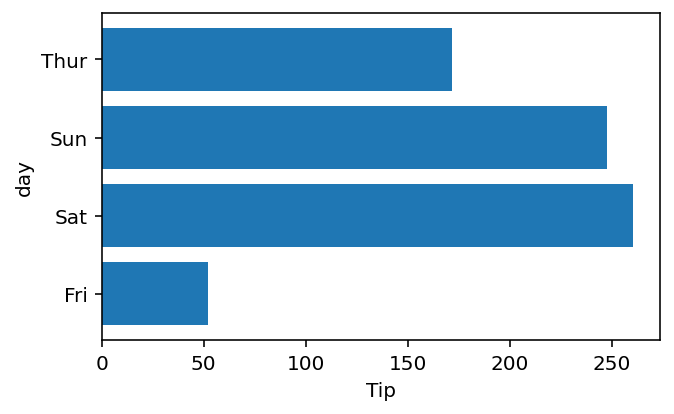

In [77]:
# day 별 tip 비교 시각화
plt.figure(figsize=(5,3))
plt.barh(y=tip_sum['day'], width=tip_sum['tip']) #★
plt.xlabel('Tip')
plt.ylabel('day')
plt.show()


**4) 참고: 선 그래프**

- 연속형 값의 변화 추이를 볼 때 선 그래프가 유용합니다.

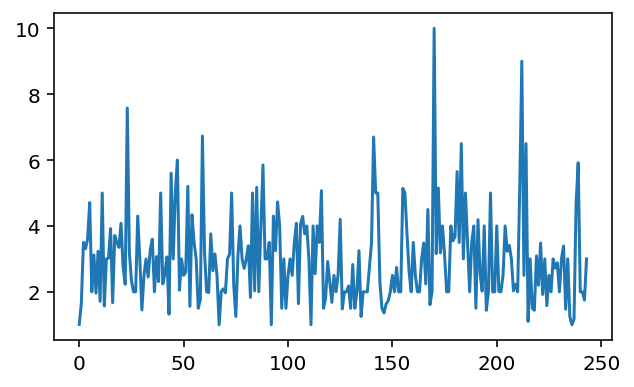

In [79]:
# tip 변경 추이 시각화
plt.figure(figsize=(5,3))
plt.plot(tip['tip'])
plt.show()

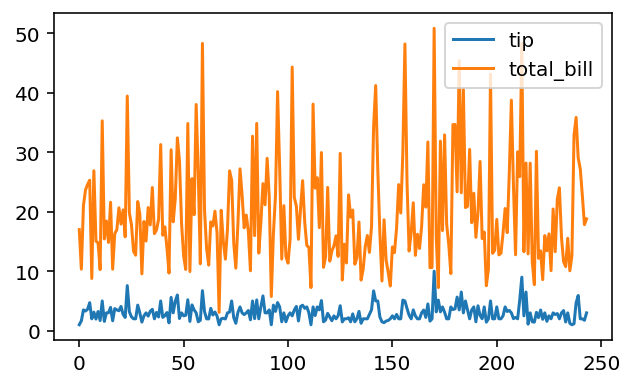

In [93]:
# tip, total_bill 변경 추이 시각화
plt.figure(figsize=(5,3))
plt.plot(tip[['tip','total_bill']])
plt.legend(['tip','total_bill'], loc='upper right') # 범례  #★
plt.show()



**5) 참고: 히스토그램**

- 연속형 값의 분포를 볼 때는 히스토그램이 유용합니다.

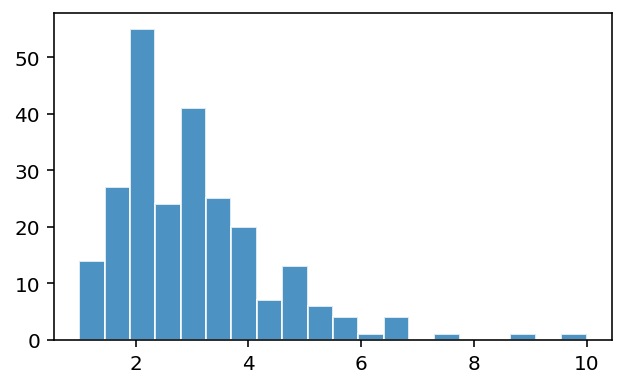

In [103]:
# tip 분포 시각화
plt.figure(figsize=(5,3))
plt.hist(tip['tip'], bins=20, alpha=0.8, edgecolor='w') # edgecolor= k 검정
plt.show()


19.785942622950824


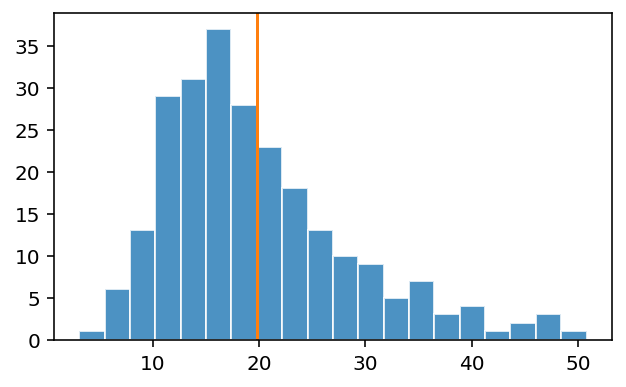

In [111]:
# total_bill 분포 시각화
total_bill_mean = tip['total_bill'].mean()
print(total_bill_mean)

plt.figure(figsize=(5,3))
plt.hist(tip['total_bill'], bins=20, alpha=0.8, edgecolor='w') 
plt.axvline(total_bill_mean, c='tab:orange') # 세로선 / c= tableau색  #★
plt.show()


### 4.1.2.여러 열 집계

- 여러 열에 대한 집계를 같이 할 수 있습니다.
- **[ ['total_bill', 'tip'] ].sum()** 형태와 같이 집계 대상 열을 리스트로 지정합니다.

In [114]:
# day별 total_bill, tip 합계 조회
tip_sum = tip.groupby(by='day',as_index=False)[['total_bill', 'tip']].sum()
tip_sum.rename(columns={'total_bill':'total_bill_sum', 'tip':'tip_sum'}, inplace=True)

# 확인
tip_sum

,day,total_bill_sum,tip_sum
0,Fri,325.88,51.96
1,Sat,1778.40,260.40
2,Sun,1627.16,247.39
3,Thur,1096.33,171.83


- sum() 메서드 앞에 아무 열도 지정하지 않으면 **기준열 이외의 모든 열에 대한 집계**가 수행됩니다.

In [121]:
# day별 나머지 열들 합계 조회
tip_sum = tip.groupby(by='day', as_index=False).sum(numeric_only=True)

# 확인
tip_sum

,day,total_bill,tip,size
0,Fri,325.88,51.96,40
1,Sat,1778.40,260.40,219
2,Sun,1627.16,247.39,216
3,Thur,1096.33,171.83,152


- **by=['day', 'smoker']** 과 같이 집계 기준 열을 여럿 설정할 수도 있습니다.

In [125]:
# day + smoker별 나머지 열들 합계 조회
tip_sum = tip.groupby(by=['day','smoker'], as_index=False).sum(numeric_only=True)

# 확인
tip_sum


,day,smoker,total_bill,tip,size
0,Fri,No,73.68,11.25,9
1,Fri,Yes,252.20,40.71,31
2,Sat,No,884.78,139.63,115
3,Sat,Yes,893.62,120.77,104
4,Sun,No,1168.88,180.57,167
5,Sun,Yes,458.28,66.82,49
6,Thur,No,770.09,120.32,112
7,Thur,Yes,326.24,51.51,40


In [126]:
# day + smoker별 나머지 열들 합계 조회
tip_sum = tip.groupby(by=['day','smoker']).sum(numeric_only=True) # 다루기는 힘들다

# 확인
tip_sum


total_bill     tip  size
day  smoker                          
Fri  No           73.68   11.25     9
     Yes         252.20   40.71    31
Sat  No          884.78  139.63   115
     Yes         893.62  120.77   104
Sun  No         1168.88  180.57   167
     Yes         458.28   66.82    49
Thur No          770.09  120.32   112
     Yes         326.24   51.51    40

## 4.2.평균, 최댓값, 최솟값, 개수 구하기

- 위와 동일한 방법으로 평균, 최댓값, 최솟값, 개수를 집계할 수 있습니다.
- sum() 메서드 대신 관련된 메서드만 적절히 지정하면 됩니다.

**1) 평균 구하기**

In [128]:
# day별 tip 평균
tip_mean = tip.groupby(by='day', as_index=False)[['tip']].mean()

# 확인
tip_mean

,day,tip
0,Fri,2.734737
1,Sat,2.993103
2,Sun,3.255132
3,Thur,2.771452


In [134]:
# day + sex 별 나머지 모든 열 평균
tip_mean = tip.groupby(by=['day','sex'], as_index=False).mean(numeric_only=True) #★

# 확인
tip_mean

,day,sex,total_bill,tip,size
0,Fri,Female,14.145556,2.781111,2.111111
1,Fri,Male,19.857000,2.693000,2.100000
2,Sat,Female,19.680357,2.801786,2.250000
3,Sat,Male,20.802542,3.083898,2.644068
4,Sun,Female,19.872222,3.367222,2.944444
5,Sun,Male,21.887241,3.220345,2.810345
6,Thur,Female,16.715312,2.575625,2.468750
7,Thur,Male,18.714667,2.980333,2.433333


In [137]:
# day + sex 별 나머지 모든 열 평균
tip_mean = tip.groupby(by=['day','sex'], as_index=False).mean()

# 확인
tip_mean

,day,sex,total_bill,tip,size
0,Fri,Female,14.145556,2.781111,2.111111
1,Fri,Male,19.857000,2.693000,2.100000
2,Sat,Female,19.680357,2.801786,2.250000
3,Sat,Male,20.802542,3.083898,2.644068
4,Sun,Female,19.872222,3.367222,2.944444
5,Sun,Male,21.887241,3.220345,2.810345
6,Thur,Female,16.715312,2.575625,2.468750
7,Thur,Male,18.714667,2.980333,2.433333


In [136]:
tip_mean = tip.groupby(by=['day','sex'], as_index=True).mean()

# 확인
tip_mean

total_bill       tip      size
day  sex                                   
Fri  Female   14.145556  2.781111  2.111111
     Male     19.857000  2.693000  2.100000
Sat  Female   19.680357  2.801786  2.250000
     Male     20.802542  3.083898  2.644068
Sun  Female   19.872222  3.367222  2.944444
     Male     21.887241  3.220345  2.810345
Thur Female   16.715312  2.575625  2.468750
     Male     18.714667  2.980333  2.433333

**2) 최댓값, 최솟값, 개수 구하기**


In [139]:
# day별 tip 최댓값
tip_max = tip.groupby(by='day', as_index=False)[['tip']].max()
# 확인
tip_max

,day,tip
0,Fri,4.73
1,Sat,10.00
2,Sun,6.50
3,Thur,6.70


In [140]:
# day별 tip 최솟값
tip_min = tip.groupby(by='day', as_index=False)[['tip']].min()

# 확인
tip_min

,day,tip
0,Fri,1.00
1,Sat,1.00
2,Sun,1.01
3,Thur,1.25
